<a href="https://colab.research.google.com/github/xsuarez/webapps/blob/master/introducci%C3%B3n_espectros_de_oleaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción a los espectros de oleaje

Los espectros de oleaje generados por los modelos de predicción están discretizados y se presentan en forma de matrices. A partir de ellos se calculan todos los campos requeridos para el pronóstico del estado del mar.

Aunque este cálculo no reviste una gran complicación una forma cómoda de operar con ellos hace uso de la extensión Python Wavespectra:

* Código fuente: https://github.com/wavespectra/wavespectra
* Documentación: https://wavespectra.readthedocs.io/en/latest/

Los espectros de oleaje del reanálisis ERA5 pueden obtenerse a través del MARS con una petición similar a la siguiente:

```
retrieve,
   area=30/-50/25/-40,   # N/W/S/E
   date=20201013,        # YYYYMMDD
   time=16,              # HH
   stream=wave,
   domain=g,
   direction=1/to/24,
   frequency=1/to/30,
   expver=1,
   levtype=sfc,
   levelist=off,
   param=251.140,
   class=ea,
   grid=1/1,            # º/º
   type=an,
   target=espectro.grib
```


##Instalación de Wavespectra:

In [1]:
! pip -q install wavespectra[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.2/792.2 kB 32.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.1/206.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 66.5 MB/s eta 0:00:00


##Descarga de espectros de oleaje

In [2]:
# ERA5 - lon:[-35,-30]  - lat:[40,45] - res=0.50º  - periodo:[01/01/2022 - 31/01/2022]
# ------------------------------------------------------------------------------------
ifile = 'spectra_era5_20220101_20220131.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/wOza0P4Fbg8V54w/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}


# # ERA5 - lon:[-35,-30]  - lat:[40,45] - res=0.50º  - periodo:[01/01/2022 - 10/01/2022]
# # ---------------------------------------------------------------------------
# ifile = 'spectra_era5_20220101_20220110.rar'
# !wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/aSeQ8EyAMGVkb7r/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}


# # ERA5 - lon:[-31,-29]  - lat:[44,46] - res=0.25º  - periodo:[17/11/2018 - 19/11/2018]
# # -------------------------------------------------------------------------------------
# ifile = 'spectra_era5_20181117.rar'
# !wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/oLfREQp0gx6Eity/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}

# WaveWatch III
# ----------------
ifile = 'ww3file.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/OAbFyd82OkaV4yj/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from spectra_era5_20220101_20220131.rar

Extracting  spectra_era5_20220101_20220131.nc                              0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98% 99

##Extensiones Python

In [3]:
# Importamos extensiones Python para trabajar con los datos
# ---------------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np
from wavespectra import read_era5, read_ww3
import warnings
warnings.filterwarnings("ignore")

##Lectura de espectros

In [4]:
# Lectura de fichero
# -------------------
ifile = '/content/spectra_era5_20220101_20220131.nc'

ds = read_era5(ifile,
               dirs=[7.5,  22.5,  37.5,  52.5,  67.5,  82.5,  97.5, 112.5, 127.5,
                    142.5, 157.5, 172.5, 187.5, 202.5, 217.5, 232.5, 247.5, 262.5,
                    277.5, 292.5, 307.5, 322.5, 337.5, 352.5])

In [5]:
# Inspección de las coordenadas
# -----------------------------
ds.coords

Coordinates:
  * lon      (lon) float32 -35.0 -34.0 -33.0 -32.0 -31.0 -30.0
  * lat      (lat) float32 45.0 44.0 43.0 42.0 41.0 40.0
  * dir      (dir) float64 7.5 22.5 37.5 52.5 67.5 ... 307.5 322.5 337.5 352.5
  * freq     (freq) float64 0.03453 0.03798 0.04178 ... 0.4527 0.498 0.5478
  * time     (time) datetime64[ns] 2022-01-01 ... 2022-01-31T21:00:00

##Dibujo de espectros 2D

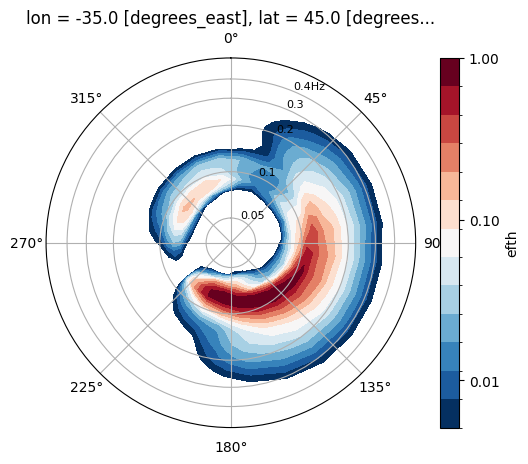

In [6]:
# Seleccionamos el espectro correspondiente a las coordenadas (lat=45, lon=-35)
# el 1 de enero de 2022 a las 12 UTC
# ------------------------------------------------------------------------------
sp = ds.sel(time='2022-01-01T12:00:00').sel(lat=45.0, lon=-35.0, method='nearest')
sp.spec.plot()

In [ ]:
# Contornos de línea de color rojo
# --------------------------------------------------------
sp.spec.plot(kind="contour", colors="red", linewidths=0.5)

In [ ]:
# Cambio del mapa de color.
# 'Contourf' es la opción por defecto.
# -------------------------------------------
sp.spec.plot(kind="contourf", cmap='rainbow')

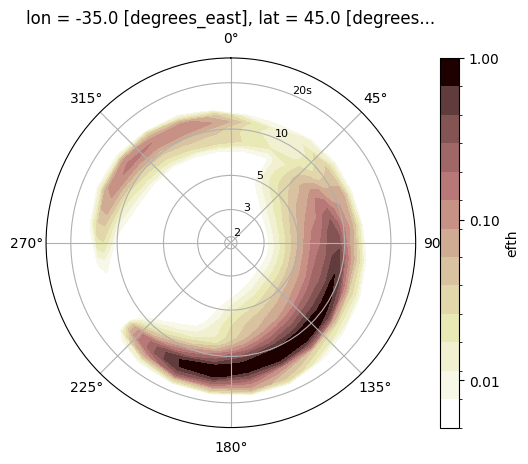

In [7]:
# Usar periodos en lugar de frecuencias
# ---------------------------------------------
sp.spec.plot(as_period=True, cmap="pink_r")

In [ ]:
# Densidad de varianza sin normalizar
# --------------------------------------
sp.spec.plot(as_period=True, normalised=False, cmap="Spectral_r")

In [ ]:
# Uso de una escala logarítmica
# -----------------------------
sp.spec.plot(
    as_period=True,
    normalised=False,
    cmap="Spectral_r",
    levels=np.logspace(np.log10(0.005), np.log10(0.4), 15),
    cbar_ticks=[0.01, 0.1, 1],
)

In [ ]:
# Escala desactiva la logarítmica en el eje de frecuencias (por defecto)
# ----------------------------------------------------------------------
sp.spec.plot(
    as_period=True,
    normalised=False,
    levels=15,
    cmap="bone_r",
    logradius=False,
    radii_ticks=[5, 10, 15, 20, 25],
)

In [ ]:
# Refinando el ángulo y tamaño de las etiquetas del eje de frecuencias
# ----------------------------------------------------------------------
sp.spec.plot(
    rmin=0,
    rmax=0.15,
    logradius=False,
    normalised=False,
    levels=25,
    cmap="gray_r",
    radii_ticks=[0.03, 0.06, 0.09, 0.12, 0.15],
    radii_labels_angle=120,
    radii_labels_size=8,
)

In [ ]:
ds.time

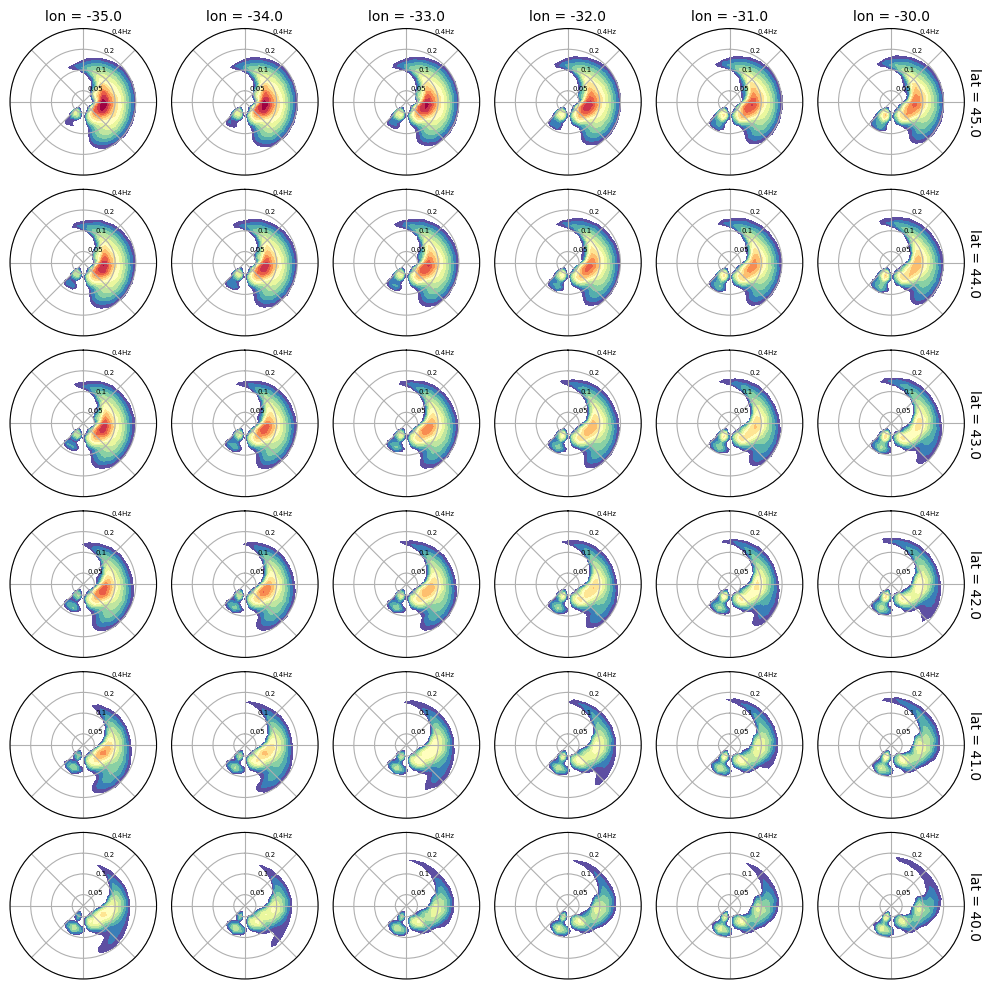

In [8]:
# Seleccionamos el espectro correspondiente a las coordenadas (lat=45, lon=-35)
# el 1 de enero de 2022 a las 12 UTC
# ------------------------------------------------------------------------------
sp = ds.sel(time='2022-01-05T18:00:00')

sp.spec.plot(
    col="lon",
    row="lat",
    figsize=(10,10),
    add_colorbar=False,
    show_theta_labels=False,
    show_radii_labels=True,
    radii_ticks=[0.05, 0.1, 0.2, 0.4],
    rmax=0.4,
    radii_labels_size=5,
    cmap="Spectral_r",
)
plt.tight_layout()

##Parámetros integrados

Podemos obtener parámetros derivados de la integración del espectro mediante las siguientes funciones:

* Altura significtiva del mar combinado: hs()
* Dirección media de propagación del mar combinado: dm()
* Altura máxima esperada de ola individual hmax()
* Periodo de las olas del pico espectral tp()
* Dirección de las olas del pico espectral dp()
* Periodo medio espectral tm01()
* Periodo medio de paso por cero tm02()
* Más funciones, [aquí](https://wavespectra.readthedocs.io/en/latest/api.html)


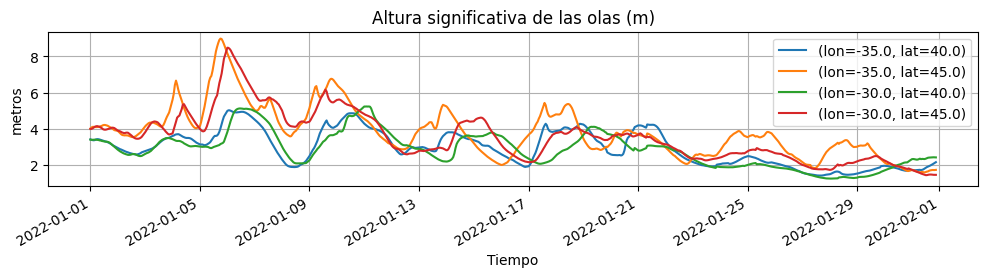

In [9]:
hs = ds.spec.hs()

fig, ax = plt.subplots(figsize=(12, 2))

for lon in (-35,-30) :
   for lat in (40,45) :
      hs.sel(lon=lon,lat=lat, method='nearest').plot(ax=ax, label='(lon=%.1f, lat=%.1f)' % (lon,lat))

ax.set_xlabel('Tiempo')
ax.set_ylabel('metros')
ax.set_title('Altura significativa de las olas (m)')
ax.grid(True)
ax.legend()


In [ ]:
hs     = ds.spec.hs()
hmax   = ds.spec.hmax()
tp     = ds.spec.tp()
tm02   = ds.spec.tm02()
tm01   = ds.spec.tm01()
dpm    = ds.spec.dpm()
dp     = ds.spec.dp()
dm     = ds.spec.dm()

fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(12,8))

lon = -35
lat = 45

hs.sel(lon=lon,lat=lat, method='nearest').plot(ax=ax[0], label='Hs')
hmax.sel(lon=lon,lat=lat, method='nearest').plot(ax=ax[0], label='Hmax')
ax[0].set_xlabel('')
ax[0].set_ylabel('metros')
ax[0].set_title('Alturas de ola')
ax[0].grid(True)
ax[0].legend()


tp.sel(lon=lon,lat=lat, method='nearest').plot(ax=ax[1], label='Tp')
tm01.sel(lon=lon,lat=lat, method='nearest').plot(ax=ax[1], label='Tm01')
tm02.sel(lon=lon,lat=lat, method='nearest').plot(ax=ax[1], label='Tm02')
ax[1].set_xlabel('')
ax[1].set_ylabel('s')
ax[1].set_title('Periodos')
ax[1].grid(True)
ax[1].legend()

dp.sel(lon=lon,lat=lat, method='nearest').plot(ax=ax[2], label='Dirección (pico espectro 2D)')
dpm.sel(lon=lon,lat=lat, method='nearest').plot(ax=ax[2], label='Dirección (pico espectro 1D)')
dm.sel(lon=lon,lat=lat, method='nearest').plot(ax=ax[2], label='Dirección media')
ax[2].set_xlabel('')
ax[2].set_ylabel('grados')
ax[2].set_title('Dirección hacia la que se propaga el oleaje (medida desde el N en sentido horario)')
ax[2].grid(True)
ax[2].legend()


plt.suptitle('Parámetros integrados en el punto lon=%.1f lat=%.1f' % (lon,lat))
plt.tight_layout()


##Particiones

Para particionar el espectro en componentes de mar de viento  y mar de fondo los datos deben incluir la velocidad y dirección del viento así como la profundidad del agua.

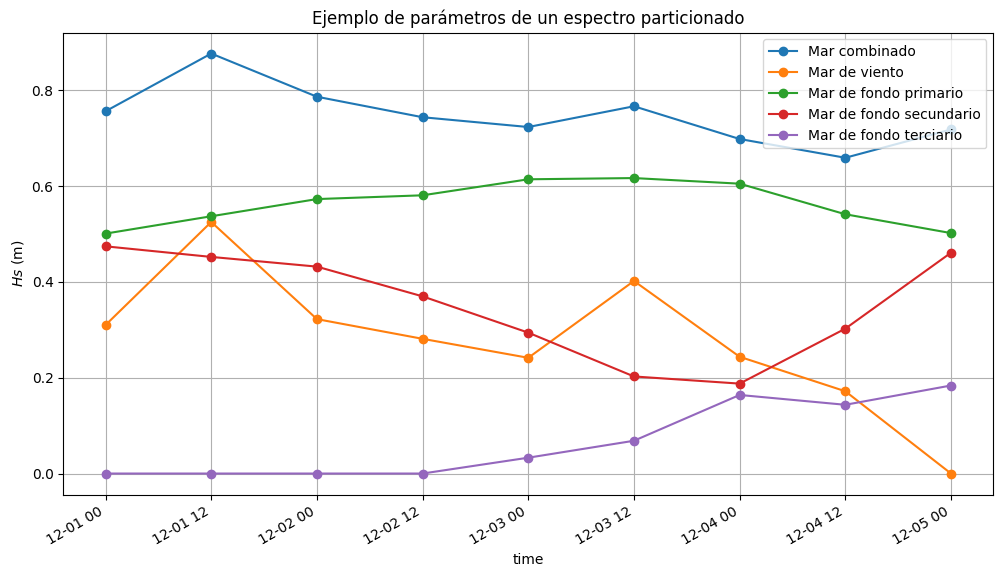

In [10]:
ds = read_ww3('/content/ww3file.nc')
dspart = ds.spec.partition(ds.wspd, ds.wdir, ds.dpt)
pstats = dspart.spec.stats(["hs", "tp", "dpm"])

fig, ax = plt.subplots(figsize=(12, 6))

ds.spec.hs().isel(site=0).plot(ax=ax, label="Mar combinado", marker="o")
pstats.hs.isel(part=0, site=0).plot(ax=ax, label="Mar de viento", marker="o")
pstats.hs.isel(part=1, site=0).plot(ax=ax, label="Mar de fondo primario", marker="o")
pstats.hs.isel(part=2, site=0).plot(ax=ax, label="Mar de fondo secundario", marker="o")
pstats.hs.isel(part=3, site=0).plot(ax=ax, label="Mar de fondo terciario", marker="o")
ax.set_ylabel("$Hs$ (m)")
ax.set_title('Ejemplo de parámetros de un espectro particionado')
ax.grid()
ax.legend()